In [1]:
import sys
sys.path.append("../GarNet")

import pandas as pd
import numpy as np

import garnet

# Having issues importing despite module exising in virtual environment? 
# See https://github.com/jupyter/notebook/issues/397

# Generate GarNet file

Skip this section if GarNet file has already been generated. See Appendix for how to obtain UCSC reference file.

In [2]:
reference_file = "../garnet_data/reference/ucsc_reference.hg19.bed"
motif_file = "../garnet_data/motifMap_hg19_short/motifMap.hg19.chr1.short.bed"
output_file = "../garnet_data/motifMap_hg19_short/garnetDB.motifmap.hg19.chr1.short.tsv"

garnet_df = garnet.construct_garnet_file(reference_file, motif_file, output_file, 10000)
garnet_df.head()

05:01:49 - GarNet: INFO -   - TSS file already exists here ../garnet_data/reference/ucsc_reference.hg19.tss.bed
05:01:49 - GarNet: INFO -   - Searching for motifs near genes. This may take a while...
05:01:50 - GarNet: INFO -   - 23192 motif-gene associations found and written to ../garnet_data/motifMap_hg19_short/garnetDB.motifmap.hg19.chr1.short.tsv


,motifChrom,motifStart,motifEnd,motifName,motifScore,motifStrand,geneName,tssStart,tssEnd,motif_gene_distance
0,chr1,59236,59242,NKX3-2,1.000000,-,OR4F5,69090,69091,-9854
1,chr1,62757,62764,SOX10,0.038916,+,OR4F5,69090,69091,-6326
2,chr1,62780,62787,TBP,1.000000,+,OR4F5,69090,69091,-6303
3,chr1,62862,62868,NKX3-2,1.000000,-,OR4F5,69090,69091,-6228
4,chr1,62936,62942,GATA3,1.000000,-,OR4F5,69090,69091,-6154


# Map peaks to genes using a549 data

This is accomplished by intersecting motifs with genes specified in the open chromatin bed file. 

In [3]:
peaks_file = "a549_example_peaks.chr1.bed"
expression_file = "a549_example_expression.txt"

df = garnet.map_peaks(peaks_file, output_file)
df.head()

,chrom,start,end,motifName,motifScore,motifStrand,geneName,geneStart,geneEnd,motif_gene_distance
0,chr1,846647,846653,HNF4A,0.180585,-,AK056486,846814,846815,-167
1,chr1,847470,847477,UBP1,0.051133,-,AK056486,846814,846815,656
2,chr1,847471,847477,Neuro D,0.037203,-,AK056486,846814,846815,657
3,chr1,847471,847477,Neuro D,0.037203,+,AK056486,846814,846815,663
4,chr1,847525,847532,IRF1,0.681795,+,AK056486,846814,846815,718


In [4]:
results = garnet.TF_regression(df, expression_file, ".")

05:01:52 - GarNet: INFO - Performing linear regression for 28 transcription factor expression profiles...
/Users/jonathanli/Documents/research/packages/GarNet2/venv/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/jonathanli/Documents/research/packages/GarNet2/venv/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/jonathanli/Documents/research/packages/GarNet2/venv/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/jonathanli/Documents/research/packages/GarNet2/venv/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


# Appendix

## Download and format reference file

### 1. Download UCSC known genes file

Visit [UCSC Table Browser](https://genome.ucsc.edu/cgi-bin/hgTables?command=start) and select the following options

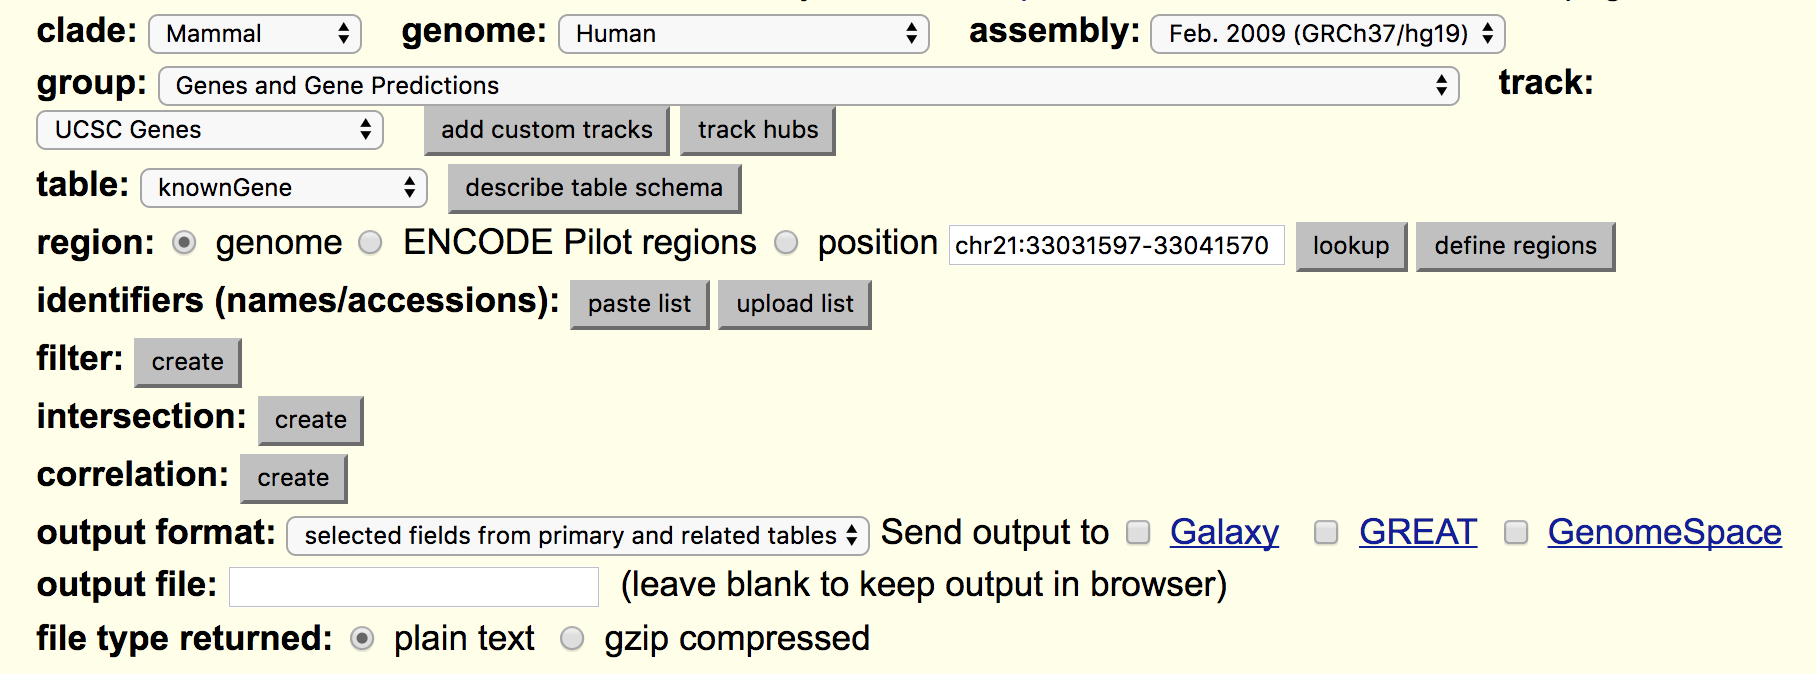

Press "get output", clear all fields, then check the following fields:

 - chrom
 - strand
 - txStart
 - txEnd
 - geneSymbol
 
Press "get output" again, and save the table locally. A 9/11/2017 copy is saved in `../garnet_data/reference/ucsc_known_genes.hg19.tsv`.

### 2. Reformat to BED file

In [5]:
ucsc_reference = pd.read_csv("../garnet_data/reference/ucsc_known_genes.hg19.tsv", sep='\t', names=["chrom", "strand", "chromStart", "chromEnd", "name"], comment="#")
ucsc_reference.drop_duplicates(inplace=True)
ucsc_reference["score"] = "."
ucsc_reference.head()

,chrom,strand,chromStart,chromEnd,name,score
0,chr1,+,11873,14409,DDX11L1,.
3,chr1,-,14361,16765,WASH7P,.
4,chr1,-,16857,17751,WASH7P,.
5,chr1,-,15795,18061,WASH7P,.
6,chr1,-,14361,19759,WASH7P,.


In [6]:
ucsc_reference_bed = ucsc_reference[["chrom", "chromStart", "chromEnd", "name", "score", "strand"]]
ucsc_reference_bed.head()

,chrom,chromStart,chromEnd,name,score,strand
0,chr1,11873,14409,DDX11L1,.,+
3,chr1,14361,16765,WASH7P,.,-
4,chr1,16857,17751,WASH7P,.,-
5,chr1,15795,18061,WASH7P,.,-
6,chr1,14361,19759,WASH7P,.,-


In [7]:
ucsc_reference_bed.to_csv("../garnet_data/reference/ucsc_reference.hg19.bed", sep='\t', header=False, index=False)